<a href="https://colab.research.google.com/github/tasdid25/Customer_Segmentation_With_RFM_Analysis_and_K_Means_Clustering/blob/main/Customer_Segmentation_With_RFM_Analysis_and_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recency, Frequency, Monetary (RFM Analysis)

Customer segmentation is one of the most important marketing tools, because it can help a business to better understand its target audience.Segmenting customer helps in better understanding the customers and thus personalizing marketing and communication for each segment.

We will segment our customer using RFM analysis
  1. Recency (R): difference between days since last purchase and observed days.
  2. Frequency (F): how many of transcaction each customer made?
  3. Monetary (M): how much each customer spend?

#**Import Library**

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**Load the Dataset**

In [136]:
df=pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,6/1/2011 12:05,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,5/27/2011 17:14,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,4/21/2011 17:05,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,11/16/2011 10:39,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,3/10/2011 8:40,9.95,13502.0,United Kingdom
...,...,...,...,...,...,...,...,...
270949,561868,21169,YOU'RE CONFUSING ME METAL SIGN,1,7/31/2011 11:26,1.69,16813.0,United Kingdom
270950,544087,84970S,HANGING HEART ZINC T-LIGHT HOLDER,5,2/15/2011 17:02,0.85,17530.0,United Kingdom
270951,544205,84987,SET OF 36 TEATIME PAPER DOILIES,1,2/17/2011 10:31,3.75,NaN,United Kingdom
270952,555383,22557,PLASTERS IN TIN VINTAGE PAISLEY,3,6/2/2011 15:13,1.65,12517.0,Germany


In [137]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [138]:
#checking info from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270954 entries, 0 to 270953
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    270954 non-null  object 
 1   StockCode    270954 non-null  object 
 2   Description  270240 non-null  object 
 3   Quantity     270954 non-null  int64  
 4   InvoiceDate  270954 non-null  object 
 5   UnitPrice    270954 non-null  float64
 6   CustomerID   203319 non-null  float64
 7   Country      270954 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 16.5+ MB


dataset consist of 9 columns and 86758 rows

In [139]:
#checking number of columns and row
df.shape

(270954, 8)

## Calculate RFM Metrics


- Recency :  our observed day minus last order transactions (max date)  of each customer
- Frequency : count of order id
- Monetary Value : sum of payment value

In [140]:
#set current date
currentDate = pd.to_datetime("2012-01-01")

#converting the InvoiceDate column in the DataFrame df to pandas datetime format.
df['InvoiceDate']=pd.to_datetime(df["InvoiceDate"])

In [141]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [142]:
currentDate

Timestamp('2012-01-01 00:00:00')

In [143]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [144]:
# Group the DataFrame by CustomerID, then get the latest (maximum) InvoiceDate for each customer
maxdate = df.groupby(["CustomerID"]).max()[['InvoiceDate']]
maxdate

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [145]:
# Calculate the number of days between the current date and each customer's most recent InvoiceDate (i.e., Recency)
(currentDate - maxdate['InvoiceDate']).dt.days

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


In [146]:
# Calculate the number of days since each customer's most recent purchase (Recency) and store it in a new column 'InvoiceAge'
maxdate['InvoiceAge'] = (currentDate - maxdate['InvoiceDate']).dt.days
maxdate

,InvoiceDate,InvoiceAge
CustomerID,,
12346.0,2011-01-18 10:17:00,347
12347.0,2011-12-07 15:52:00,24
12348.0,2011-09-25 13:13:00,97
12349.0,2011-11-21 09:51:00,40
12350.0,2011-02-02 16:01:00,332
...,...,...
18280.0,2011-03-07 09:52:00,299
18281.0,2011-06-12 10:53:00,202
18282.0,2011-12-02 11:43:00,29


#**Recency Table**

In [147]:
# Create a new DataFrame 'recency' by dropping the 'InvoiceDate' column from 'maxdate', keeping only the 'InvoiceAge' (i.e., Recency)
recency = maxdate.drop('InvoiceDate', axis=1)
recency

,InvoiceAge
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


#**Frequency Table**

In [148]:
# Remove duplicate rows based on 'InvoiceNo' to get unique invoices (i.e., unique purchases)
freq = df.drop_duplicates(subset="InvoiceNo")
freq.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [149]:
freq = freq.groupby(["CustomerID"]).count()[["InvoiceNo"]]
freq

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,2


#**Monetary Table**

In [150]:
# Calculate total amount spent per transaction by multiplying Quantity by UnitPrice, and store it in a new 'total' column
df["total"] = df["Quantity"] * df["UnitPrice"]


In [151]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,20.40
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,27.80
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2.60
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,5.85
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom,19.90


In [152]:
# Calculate the total amount spent ('total') by each customer by summing all their invoices
money = df.groupby(["CustomerID"])[["total"]].sum()

In [153]:
money.head()

,total
CustomerID,
12346.0,0.00
12347.0,2374.09
12348.0,980.64
12349.0,1010.18
12350.0,144.20


In [154]:
#Filter the DataFrame to show only the rows where CustomerID is 12346.0
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
35075,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
177423,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


#**RFM Table**

In [155]:
# Combine the Recency, Frequency, and Monetary DataFrames side-by-side into a single RFM table
RFM=pd.concat([recency,freq,money], axis=1)
RFM

,InvoiceAge,InvoiceNo,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,2374.09
12348.0,97,4,980.64
12349.0,40,1,1010.18
12350.0,332,1,144.20
...,...,...,...
18280.0,299,1,109.35
18281.0,202,1,27.03
18282.0,29,2,57.04


In [156]:
RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,2374.09
12348.0,97,4,980.64
12349.0,40,1,1010.18
12350.0,332,1,144.20
...,...,...,...
18280.0,299,1,109.35
18281.0,202,1,27.03
18282.0,29,2,57.04


#**Feature Scaling**


In [157]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler to the RFM data and transform it, resulting in scaled (standardized) values for each feature
scaled = scaler.fit_transform(RFM)


In [158]:
scaled

array([[ 2.30700939, -0.31313195, -0.18593345],
       [-0.89627261,  0.28043477,  0.28628814],
       [-0.17231104, -0.07570526,  0.00912208],
       ...,
       [-0.8466862 , -0.31313195, -0.17458783],
       [-0.88635533,  1.34885487,  0.02570291],
       [-0.49958134, -0.1944186 , -0.05671592]])

In [159]:
scaled.shape

(4306, 3)

#**Determine Cluster Number**


To determine cluster number we will use Elbow Method to find of cluster number k

In [160]:
from sklearn.cluster import KMeans

In [161]:
#Fit k-means and calculate SSE for eack k
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(scaled)
    sse.append(km.inertia_)

In [162]:
sse

[12918.000000000045,
 9290.589291366075,
 6073.128938980118,
 4785.982322507738,
 3657.2670928167854,
 3352.2267762975466,
 2466.4945754048667,
 1730.597077390637,
 1502.3529950877628]

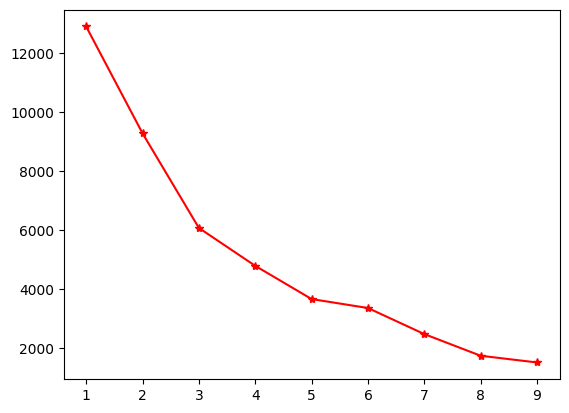

In [163]:
#plot SSE for each k
plt.plot(k_range, sse, 'r-*')
plt.xlabel ='k'
plt.ylabel = 'Sum of Squared Error'

From elbow method, we can see that the optimal number of cluster is around 3 or 4 cluster.

#**Running K-Means Clustering on Pre-Processing Data**

In [164]:
#run kmeans clustering with n_cluster = 5
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)

KMeans(n_clusters=3)

In [165]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [166]:
kmeans.labels_.shape

(4306,)

In [167]:
# Assign cluster labels (from kmeans) to the 'Clusters' column in RFM DataFrame, adding 1 to start cluster numbering at 1 instead of 0
RFM["Clusters"]=(kmeans.labels_+1)

In [168]:
RFM.head()

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12347.0,24,7,2374.09,2
12348.0,97,4,980.64,2
12349.0,40,1,1010.18,2
12350.0,332,1,144.20,1


In [169]:
RFM.Clusters.unique()

array([1, 2, 3], dtype=int32)

In [170]:
RFM[RFM.Clusters==1].head()

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12350.0,332,1,144.20,1
12353.0,226,1,77.40,1
12354.0,254,1,459.76,1
12355.0,236,1,208.50,1


In [171]:
RFM[RFM.Clusters==2].head()

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12347.0,24,7,2374.09,2
12348.0,97,4,980.64,2
12349.0,40,1,1010.18,2
12352.0,58,11,243.38,2
12357.0,55,1,2770.47,2


In [172]:
RFM[RFM.Clusters==3].head()

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12415.0,46,20,62863.92,3
12748.0,22,206,15548.49,3
13089.0,24,97,29358.93,3
13694.0,25,52,29135.95,3
14156.0,31,59,51376.26,3


In [173]:
# Calculate the average Recency, Frequency, and Monetary values for each cluster by grouping RFM data by 'Clusters'
final=RFM.groupby("Clusters").mean()[["Recency","Frequency","Monetary"]]
final

,Recency,Frequency,Monetary
Clusters,,,
1,266.348921,1.724820,87.672320
2,61.609748,5.259748,990.362010
3,28.500000,94.714286,55593.915714


#**📊 RFM Cluster Summary**

| Cluster | Recency (↓ is better) | Frequency (↑ is better) | Monetary (↑ is better) | Interpretation |
|---------|------------------------|--------------------------|-------------------------|----------------|
| **1**   | 266.35 days            | 1.72 purchases           | \$87.67                 | ❌ Inactive or one-time customers |
| **2**   | 61.61 days             | 5.26 purchases           | \$990.36                | ⚠️ Potential loyalists, moderate value |
| **3**   | 28.50 days             | 94.71 purchases          | \$55,593.92             | ✅ Best, most loyal and profitable customers |

---

### 🧠 Insights:
- **Cluster 3 ("Diamond")**: Most recent, frequent, and high-spending customers. Focus VIP marketing here.
- **Cluster 2 ("Gold")**: Moderate spenders with some loyalty. Could benefit from re-engagement.
- **Cluster 1 ("Silver")**: Least active and lowest value. Consider reactivation or remove from campaigns.



#**Grouping the customers**

In [174]:
# Define a function to assign group names based on cluster number
def func(row):
    if row["Clusters"]==2:
        return 'Dimond'
    elif row["Clusters"]==1:
        return 'Gold'
    else:
        return 'Silver'

In [175]:
# Apply the function to each row of RFM to create a new 'group' column with descriptive labels
RFM['group']=RFM.apply(func, axis=1)

In [176]:
RFM.head()

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,1,Gold
12347.0,24,7,2374.09,2,Dimond
12348.0,97,4,980.64,2,Dimond
12349.0,40,1,1010.18,2,Dimond
12350.0,332,1,144.20,1,Gold


#**Result**


In [177]:
result = pd.DataFrame(RFM.group.value_counts())

In [178]:
result = result.reset_index()
result

,group,count
0,Dimond,3180
1,Gold,1112
2,Silver,14


In [180]:
import seaborn as sns

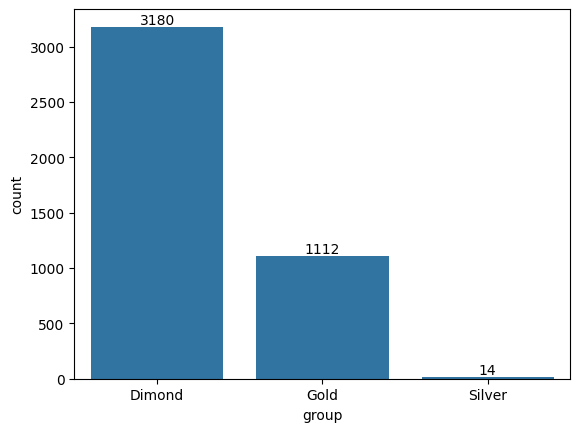

In [181]:
datalabel=sns.barplot(x="group", y="count", data=result, estimator=np.sum)
for i in datalabel.containers:
    datalabel.bar_label(i,)

In [182]:
# Filter the RFM DataFrame to include only customers in Cluster 3
ABC = RFM[RFM.Clusters==3]

In [183]:
# Within Cluster 3, find the customer(s) with the minimum Monetary value
ABC[ABC['Monetary']==ABC['Monetary'].min()]

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
14606.0,23,114,5918.32,3,Silver
